## Introdução

nome matricula e curso
dicionario dos dados
objetivo


## Bibliotecas

In [75]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

## Importando Dados

In [11]:
microdados =  pd.read_csv("microdados_enem_2022 (1)\DADOS\MICRODADOS_ENEM_2022.csv", sep=";", encoding="ISO-8859-1")

## Limpeza dos Dados

A princício, vamos observar se os dados foram devidamente importados e quais colunas compõem o dataset.

In [12]:
microdados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [13]:
microdados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

Aqui, irei criar uma variável chamada "filtro" que irá receber os nomes das colunas que eu quero utilizar para a minha análise.

In [14]:
filtro = ["TP_SEXO", "TP_COR_RACA", "NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_REDACAO", "Q006"]

microdados_filtrados = microdados.filter(items=filtro)
microdados_filtrados.head()

,TP_SEXO,TP_COR_RACA,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO,Q006
0,M,2,NaN,NaN,NaN,B
1,M,1,NaN,NaN,NaN,Q
2,F,2,546.0,565.3,760.0,B
3,M,3,388.6,416.0,320.0,A
4,M,3,NaN,NaN,NaN,B


Podemos enxergar dados faltantes no meu dataset. Para minha análise, não irei atribuir valores fictícios, apenas irei remover todos os dados faltantes da minha tabela.

In [15]:
microdados_filtrados = microdados_filtrados.dropna()
microdados_filtrados

,TP_SEXO,TP_COR_RACA,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO,Q006
2,F,2,546.0,565.3,760.0,B
3,M,3,388.6,416.0,320.0,A
7,F,2,427.3,404.9,440.0,B
9,F,3,461.0,435.3,360.0,B
11,F,1,539.8,456.8,940.0,B
...,...,...,...,...,...,...
3476095,M,1,504.4,423.6,580.0,C
3476097,F,2,633.2,596.3,740.0,D
3476098,M,3,495.6,597.4,580.0,B
3476099,F,1,524.8,432.0,520.0,B


In [16]:
microdados_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2344823 entries, 2 to 3476102
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TP_SEXO          object 
 1   TP_COR_RACA      int64  
 2   NU_NOTA_CH       float64
 3   NU_NOTA_MT       float64
 4   NU_NOTA_REDACAO  float64
 5   Q006             object 
dtypes: float64(3), int64(1), object(2)
memory usage: 125.2+ MB


## Visualizações

##### Sexo dos Participantes

A primeira visualização é um gráfico de barras para observar a quantidade de participantes no exame em relação ao Sexo.

Text(0, 0.5, 'Quantidade (em Milhões)')

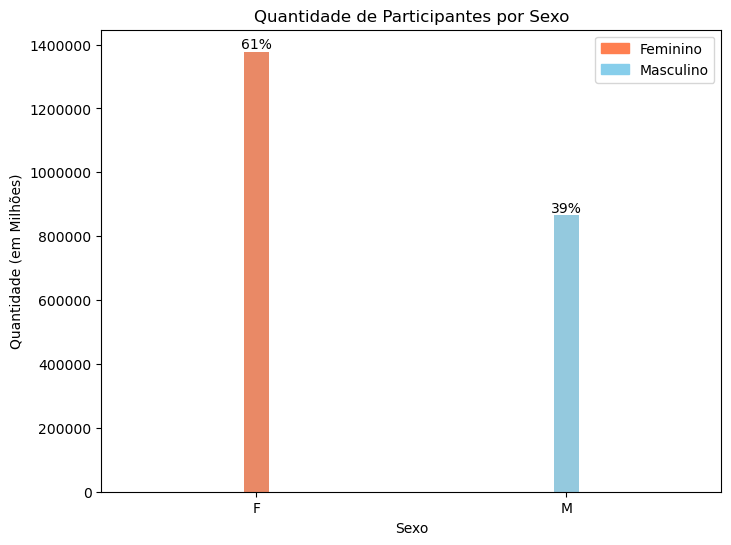

In [76]:
sexo_quantidade = microdados_filtrados["TP_SEXO"].value_counts().sort_index()

plt.figure(figsize=(8, 6))

total = sum(sexo_quantidade.values)
for i, v in enumerate(sexo_quantidade.values):
    percentual = (v / total) * 100
    plt.text(i, v + 0.5, f"{percentual:.0f}%", ha='center', va='bottom')

colors = ["coral", "Skyblue"]

#Legenda do Gráfico
legend_labels = ['Feminino', 'Masculino']
#A função patch é utilizada para criar legendas personalizadas para os gráficos do matplot
legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_patches)

sns.barplot(x= sexo_quantidade.index, y=sexo_quantidade.values,palette=colors , width=0.08)
#Remoção da Notação Científica do eixo Y
plt.ticklabel_format(style='plain', axis='y')

plt.title("Quantidade de Participantes por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Quantidade (em Milhões)")


In [ ]:
sexo_quantidade

TP_SEXO
F    1436668
M     908155
Name: count, dtype: int64

Graças a diversas lutas por igualdade de gênero, as mulheres podem realizar o sonho de frequentar uma faculdade. No ano de 2022, podemos notar que a quantidade de participantes do sexo feminino superou significativamente a quantidade de participantes do sexo masculino. Essa observação é muito importante, pois reflete o aumento do acesso das mulheres à educação superior. 

##### Cor dos Participantes

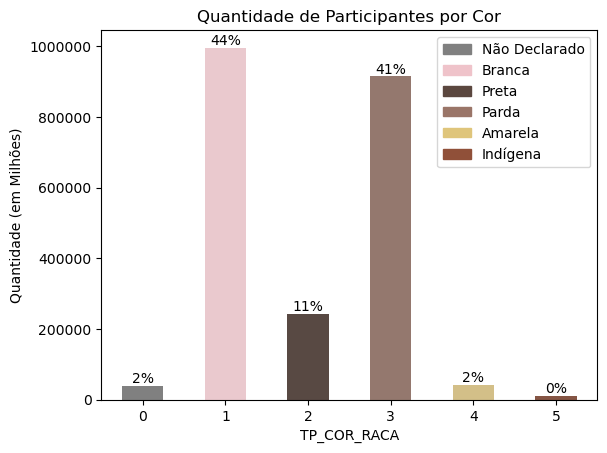

In [77]:
cor_quantidade = microdados_filtrados["TP_COR_RACA"].value_counts().sort_index()


total = sum(cor_quantidade.values)
for i, v in enumerate(cor_quantidade.values):
    percentual = (v / total) * 100
    plt.text(i, v + 0.5, f"{percentual:.0f}%", ha='center', va='bottom')


colors = ['gray', '#EFC3CA', '#5B473F', '#9A7568', '#DFC57B', '#905039']
legend_labels=["Não Declarado", "Branca", "Preta", "Parda", "Amarela", "Indígena"]
legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_patches)

plt.title("Quantidade de Participantes por Cor")
plt.xlabel("Cor do Participante")
plt.ylabel("Quantidade (em Milhões)")



sns.barplot(x=cor_quantidade.index, y=cor_quantidade.values, palette=colors, width=0.5)
plt.ticklabel_format(style="plain", axis="y")



In [ ]:
cor_quantidade

TP_COR_RACA
0      40871
1    1026418
2     255863
3     966698
4      43782
5      11191
Name: count, dtype: int64

Quando removemos os dados nulos, a análise revela uma distribuição desafiadora. Apenas 3,048 mil indivíduos indígenas participaram do exame, enquanto pessoas pretas e pardas também se encontram em números reduzidos, representando juntas uma minoria significativa, com pessoas pretas compreendendo apenas 9% dos participantes. A representação de pessoas amarelas é ainda mais escassa, alcançando apenas 2%. Por outro lado, a maioria esmagadora dos participantes é composta por pessoas brancas.

##### Faixa de Renda 

<Axes: title={'center': 'Quantidade de Participante por Renda'}, xlabel='Q006', ylabel='Quantidade (em Milhões)'>

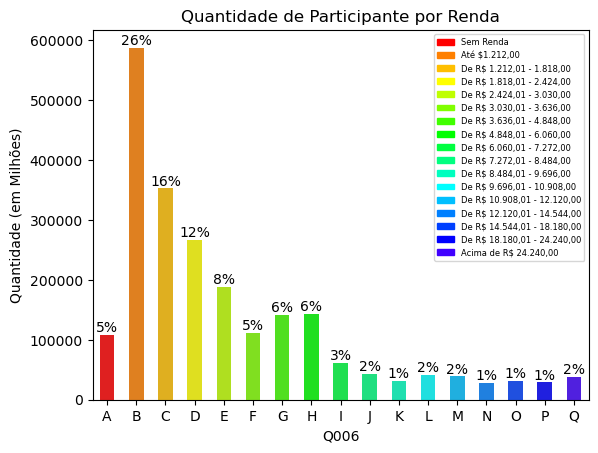

In [80]:
renda_quantidade = microdados_filtrados["Q006"].value_counts().sort_index()


total = sum(renda_quantidade.values)
for i, v in enumerate(renda_quantidade.values):
    percentual = (v / total) * 100
    plt.text(i, v + 0.5, f"{percentual:.0f}%", ha='center', va='bottom')


plt.title("Quantidade de Participante por Renda")
plt.xlabel("Faixa de Renda")
plt.ylabel("Quantidade (em Milhões)")
colors = ["#ff0000", "#ff8000", "#ffbf00", "#ffff00", "#bfff00", "#80ff00", "#40ff00", "#00ff00", "#00ff40", "#00ff80", "#00ffbf", "#00ffff", "#00bfff", "#0080ff", "#0040ff", "#0000ff", "#4000ff"]
legend_labels = ["Sem Renda", "Até $1.212,00", "De R$ 1.212,01 - 1.818,00", "De R$ 1.818,01 - 2.424,00", "De R$ 2.424,01 - 3.030,00", "De R$ 3.030,01 - 3.636,00", "De R$ 3.636,01 - 4.848,00", "De R$ 4.848,01 - 6.060,00", "De R$ 6.060,01 - 7.272,00", "De R$ 7.272,01 - 8.484,00", "De R$ 8.484,01 - 9.696,00", "De R$ 9.696,01 - 10.908,00", "De R$ 10.908,01 - 12.120,00", "De R$ 12.120,01 - 14.544,00", "De R$ 14.544,01 - 18.180,00", "De R$ 18.180,01 - 24.240,00", "Acima de R$ 24.240,00"]
legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_patches, fontsize=6)

sns.barplot(x=renda_quantidade.index, y=renda_quantidade.values, palette=colors, width=0.5)


In [ ]:
renda_quantidade

Q006
A    119268
B    630492
C    369704
D    276804
E    194527
F    115203
G    145812
H    145866
I     62344
J     44115
K     31448
L     41407
M     39300
N     28365
O     31826
P     29282
Q     39060
Name: count, dtype: int64

Pode-se notar que a maioria dos participantes pertence a famílias cuja renda é de até um salário mínimo. Cerca de 27 mil inscritos no exame não possuem renda alguma.

##### Notas 

In [63]:
#Removendo notas zeros do meu conjunto de dados
notas = microdados_filtrados[(microdados_filtrados["NU_NOTA_MT"] != 0) & (microdados_filtrados["NU_NOTA_CH"] != 0) & (microdados_filtrados["NU_NOTA_REDACAO"] != 0)]
microdados_filtrados["NU_NOTA_MT"] = notas["NU_NOTA_MT"]
microdados_filtrados["NU_NOTA_CH"] = notas["NU_NOTA_CH"]
microdados_filtrados["NU_NOTA_REDACAO"] = notas["NU_NOTA_REDACAO"]
microdados_filtrados

,TP_SEXO,TP_COR_RACA,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO,Q006
2,F,2,546.0,565.3,760.0,B
3,M,3,388.6,416.0,320.0,A
7,F,2,427.3,404.9,440.0,B
9,F,3,461.0,435.3,360.0,B
11,F,1,539.8,456.8,940.0,B
...,...,...,...,...,...,...
3476095,M,1,504.4,423.6,580.0,C
3476097,F,2,633.2,596.3,740.0,D
3476098,M,3,495.6,597.4,580.0,B
3476099,F,1,524.8,432.0,520.0,B


Text(0, 0.5, 'Notas de Ciências Humanas')

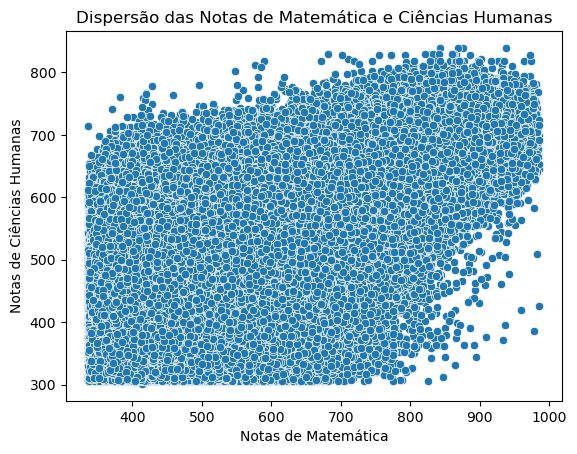

In [84]:
sns.scatterplot(data=microdados_filtrados, x="NU_NOTA_MT", y="NU_NOTA_CH")
plt.title("Dispersão das Notas de Matemática e Ciências Humanas")
plt.xlabel("Notas de Matemática")
plt.ylabel("Notas de Ciências Humanas")

In [62]:
dados_group = microdados_filtrados[["NU_NOTA_CH", "NU_NOTA_MT"]]
dados_group

,NU_NOTA_CH,NU_NOTA_MT
2,546.0,565.3
3,388.6,416.0
7,427.3,404.9
9,461.0,435.3
11,539.8,456.8
...,...,...
3476095,504.4,423.6
3476097,633.2,596.3
3476098,495.6,597.4
3476099,524.8,432.0


In [64]:
kmeans = KMeans(n_clusters = 10, random_state=42)
kmeans.fit(dados_group)

c:\Users\diasd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [65]:
kmeans.labels_

array([9, 8, 8, ..., 2, 1, 0])

In [66]:
centroids = kmeans.cluster_centers_

In [67]:
clusters = kmeans.labels_
clusters

array([9, 8, 8, ..., 2, 1, 0])

<Axes: xlabel='NU_NOTA_CH', ylabel='NU_NOTA_MT'>

c:\Users\diasd\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\diasd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


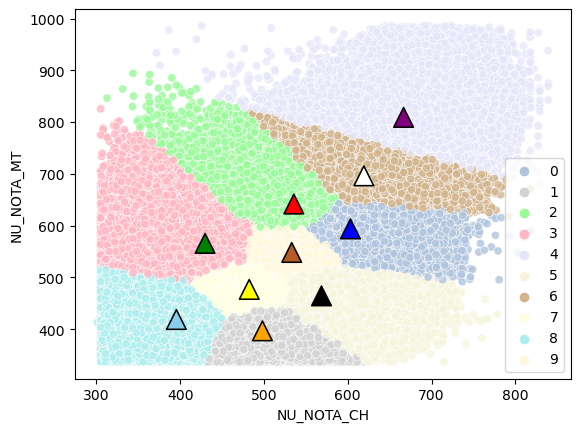

In [73]:
centroid_colors = ['blue', 'orange', 'red', 'green', 'purple', 'black', 'white', 'yellow', 'skyblue', '#B65A26']

cluster_colors = ['#B0C4DE', '#D3D3D3', '#98FB98', '#FFB6C1', '#E6E6FA', '#F5F5DC', '#D2B48C', '#FFFFE0', '#AFEEEE', '#FFF8DC']

plt.title("")
sns.scatterplot(data=dados_group, x="NU_NOTA_CH", y = "NU_NOTA_MT", hue= kmeans.labels_, palette=cluster_colors, alpha=0.8)
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='^',edgecolor='black', color=centroid_colors, s=200)

In [71]:
microdados_filtrados["Grupos"] = clusters
microdados_filtrados

,TP_SEXO,TP_COR_RACA,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Grupos
2,F,2,546.0,565.3,760.0,B,9
3,M,3,388.6,416.0,320.0,A,8
7,F,2,427.3,404.9,440.0,B,8
9,F,3,461.0,435.3,360.0,B,7
11,F,1,539.8,456.8,940.0,B,5
...,...,...,...,...,...,...,...
3476095,M,1,504.4,423.6,580.0,C,1
3476097,F,2,633.2,596.3,740.0,D,0
3476098,M,3,495.6,597.4,580.0,B,2
3476099,F,1,524.8,432.0,520.0,B,1


### Analisando só o grupo de maiores notas.

In [86]:
cluster_desejado = 4

dados_cluster_desejado = microdados_filtrados[clusters == cluster_desejado]

dados_cluster_desejado

,TP_SEXO,TP_COR_RACA,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Grupos
55,F,1,684.9,905.5,900.0,E,4
71,F,1,669.4,757.7,820.0,C,4
138,F,1,631.0,807.7,860.0,E,4
177,F,1,605.7,864.4,920.0,K,4
345,F,1,661.9,843.8,920.0,E,4
...,...,...,...,...,...,...,...
3475570,M,1,599.0,839.9,840.0,B,4
3475609,M,1,642.7,787.8,720.0,D,4
3475785,M,1,715.6,832.8,960.0,Q,4
3475957,M,3,629.2,797.8,680.0,B,4


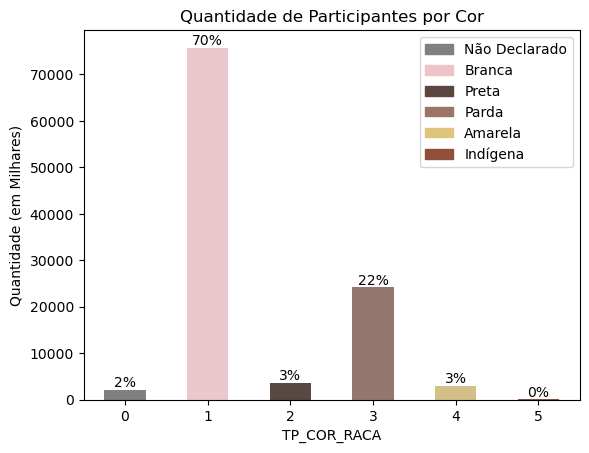

In [95]:
cor_quantidade = dados_cluster_desejado["TP_COR_RACA"].value_counts().sort_index()


total = sum(cor_quantidade.values)
for i, v in enumerate(cor_quantidade.values):
    percentual = (v / total) * 100
    plt.text(i, v + 0.5, f"{percentual:.0f}%", ha='center', va='bottom')


colors = ['gray', '#EFC3CA', '#5B473F', '#9A7568', '#DFC57B', '#905039']
legend_labels=["Não Declarado", "Branca", "Preta", "Parda", "Amarela", "Indígena"]
legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_patches)

plt.title("Quantidade de Participantes por Cor")
plt.xlabel("Cor do Participante")
plt.ylabel("Quantidade (em Milhares)")



sns.barplot(x=cor_quantidade.index, y=cor_quantidade.values, palette=colors, width=0.5)
plt.ticklabel_format(style="plain", axis="y")


<Axes: title={'center': 'Quantidade de Participante por Renda'}, xlabel='Q006', ylabel='Quantidade (em Milhares)'>

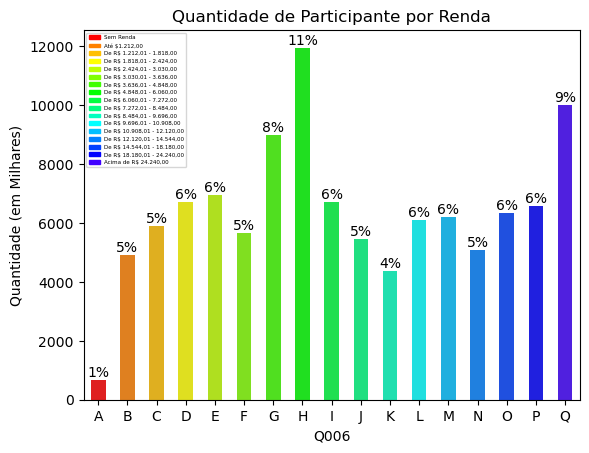

In [94]:
renda_quantidade = dados_cluster_desejado["Q006"].value_counts().sort_index()


total = sum(renda_quantidade.values)
for i, v in enumerate(renda_quantidade.values):
    percentual = (v / total) * 100
    plt.text(i, v + 0.5, f"{percentual:.0f}%", ha='center', va='bottom')


plt.title("Quantidade de Participante por Renda")
plt.xlabel("Faixa de Renda")
plt.ylabel("Quantidade (em Milhares)")
colors = ["#ff0000", "#ff8000", "#ffbf00", "#ffff00", "#bfff00", "#80ff00", "#40ff00", "#00ff00", "#00ff40", "#00ff80", "#00ffbf", "#00ffff", "#00bfff", "#0080ff", "#0040ff", "#0000ff", "#4000ff"]
legend_labels = ["Sem Renda", "Até $1.212,00", "De R$ 1.212,01 - 1.818,00", "De R$ 1.818,01 - 2.424,00", "De R$ 2.424,01 - 3.030,00", "De R$ 3.030,01 - 3.636,00", "De R$ 3.636,01 - 4.848,00", "De R$ 4.848,01 - 6.060,00", "De R$ 6.060,01 - 7.272,00", "De R$ 7.272,01 - 8.484,00", "De R$ 8.484,01 - 9.696,00", "De R$ 9.696,01 - 10.908,00", "De R$ 10.908,01 - 12.120,00", "De R$ 12.120,01 - 14.544,00", "De R$ 14.544,01 - 18.180,00", "De R$ 18.180,01 - 24.240,00", "Acima de R$ 24.240,00"]
legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_patches, fontsize=4)

sns.barplot(x=renda_quantidade.index, y=renda_quantidade.values, palette=colors, width=0.5)

In [96]:
renda_quantidade

Q006
A      681
B     4916
C     5902
D     6716
E     6958
F     5656
G     8993
H    11947
I     6724
J     5449
K     4379
L     6105
M     6217
N     5080
O     6342
P     6567
Q    10016
Name: count, dtype: int64

### Analisando só o grupo de menores notas.

In [97]:
cluster_desejado = 8

dados_cluster_desejado = microdados_filtrados[clusters == cluster_desejado]

dados_cluster_desejado

,TP_SEXO,TP_COR_RACA,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Grupos
3,M,3,388.6,416.0,320.0,A,8
7,F,2,427.3,404.9,440.0,B,8
31,M,1,415.9,352.4,360.0,B,8
40,F,3,420.0,430.4,560.0,B,8
42,F,3,340.6,496.6,720.0,B,8
...,...,...,...,...,...,...,...
3475943,F,3,409.8,372.3,620.0,E,8
3475966,F,3,380.1,452.8,480.0,D,8
3475987,F,3,427.6,459.3,360.0,C,8
3476008,M,3,366.9,479.8,300.0,B,8


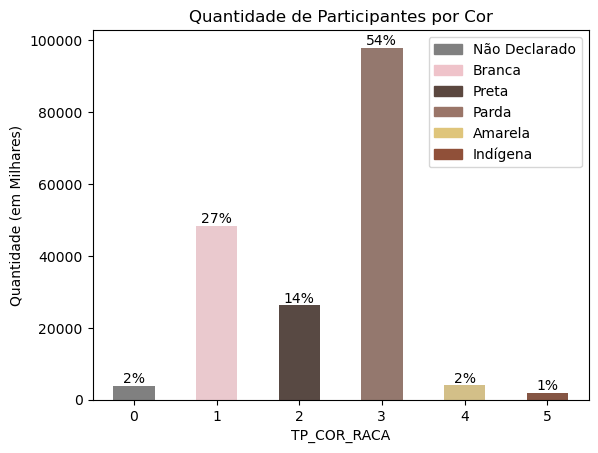

In [98]:
cor_quantidade = dados_cluster_desejado["TP_COR_RACA"].value_counts().sort_index()


total = sum(cor_quantidade.values)
for i, v in enumerate(cor_quantidade.values):
    percentual = (v / total) * 100
    plt.text(i, v + 0.5, f"{percentual:.0f}%", ha='center', va='bottom')


colors = ['gray', '#EFC3CA', '#5B473F', '#9A7568', '#DFC57B', '#905039']
legend_labels=["Não Declarado", "Branca", "Preta", "Parda", "Amarela", "Indígena"]
legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_patches)

plt.title("Quantidade de Participantes por Cor")
plt.xlabel("Cor do Participante")
plt.ylabel("Quantidade (em Milhares)")



sns.barplot(x=cor_quantidade.index, y=cor_quantidade.values, palette=colors, width=0.5)
plt.ticklabel_format(style="plain", axis="y")


In [101]:
cor_quantidade

TP_COR_RACA
0     3759
1    48386
2    26210
3    97916
4     3992
5     1956
Name: count, dtype: int64

<Axes: title={'center': 'Quantidade de Participante por Renda'}, xlabel='Q006', ylabel='Quantidade (em Milhares)'>

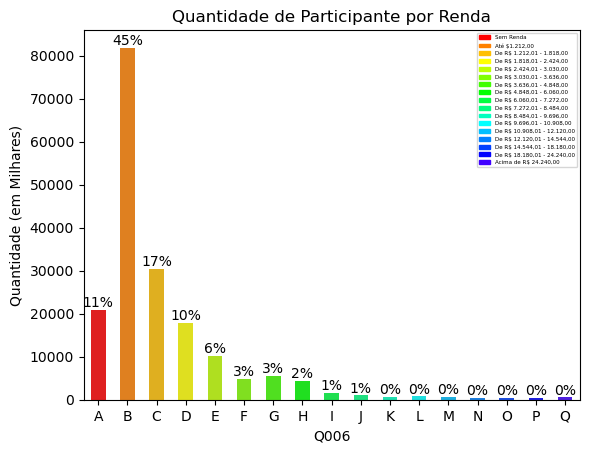

In [99]:
renda_quantidade = dados_cluster_desejado["Q006"].value_counts().sort_index()


total = sum(renda_quantidade.values)
for i, v in enumerate(renda_quantidade.values):
    percentual = (v / total) * 100
    plt.text(i, v + 0.5, f"{percentual:.0f}%", ha='center', va='bottom')


plt.title("Quantidade de Participante por Renda")
plt.xlabel("Faixa de Renda")
plt.ylabel("Quantidade (em Milhares)")
colors = ["#ff0000", "#ff8000", "#ffbf00", "#ffff00", "#bfff00", "#80ff00", "#40ff00", "#00ff00", "#00ff40", "#00ff80", "#00ffbf", "#00ffff", "#00bfff", "#0080ff", "#0040ff", "#0000ff", "#4000ff"]
legend_labels = ["Sem Renda", "Até $1.212,00", "De R$ 1.212,01 - 1.818,00", "De R$ 1.818,01 - 2.424,00", "De R$ 2.424,01 - 3.030,00", "De R$ 3.030,01 - 3.636,00", "De R$ 3.636,01 - 4.848,00", "De R$ 4.848,01 - 6.060,00", "De R$ 6.060,01 - 7.272,00", "De R$ 7.272,01 - 8.484,00", "De R$ 8.484,01 - 9.696,00", "De R$ 9.696,01 - 10.908,00", "De R$ 10.908,01 - 12.120,00", "De R$ 12.120,01 - 14.544,00", "De R$ 14.544,01 - 18.180,00", "De R$ 18.180,01 - 24.240,00", "Acima de R$ 24.240,00"]
legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_patches, fontsize=4)

sns.barplot(x=renda_quantidade.index, y=renda_quantidade.values, palette=colors, width=0.5)

In [100]:
renda_quantidade

Q006
A    20795
B    81842
C    30344
D    17929
E    10136
F     4802
G     5462
H     4346
I     1624
J     1013
K      626
L      791
M      691
N      474
O      423
P      391
Q      530
Name: count, dtype: int64